In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Abhinav/Test/DL/churned.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


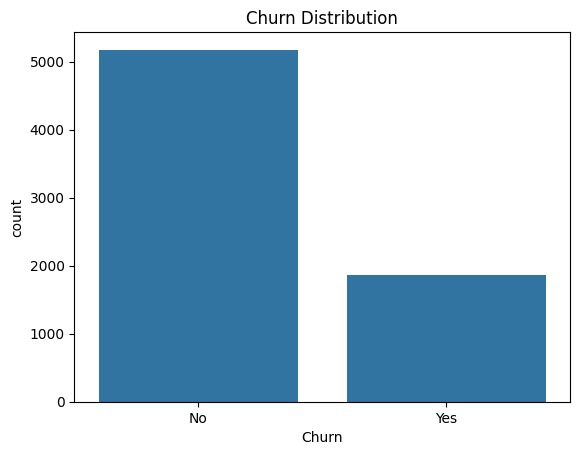

In [6]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

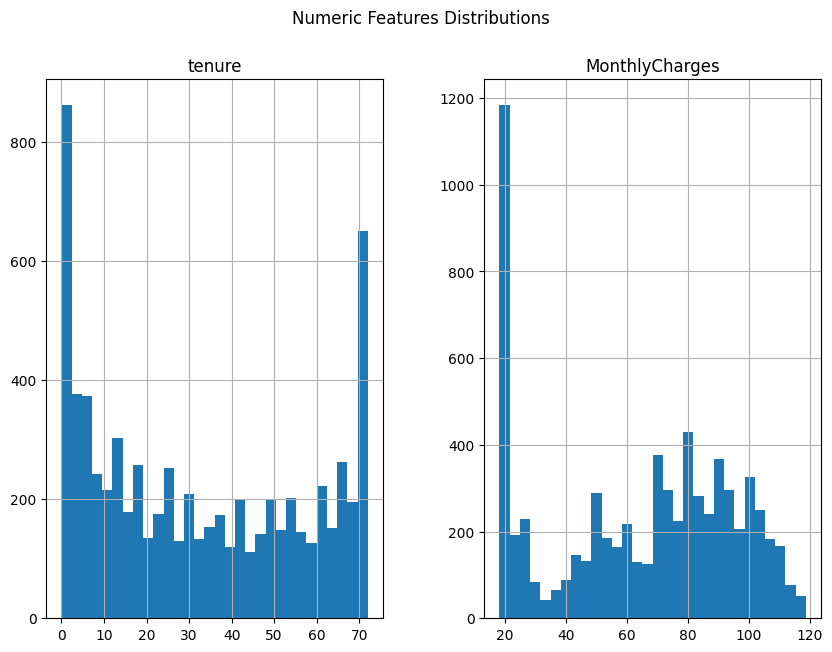

In [7]:
# distribution of numerical features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features].hist(bins=30, figsize=(10,7))
plt.suptitle('Numeric Features Distributions')
plt.show()

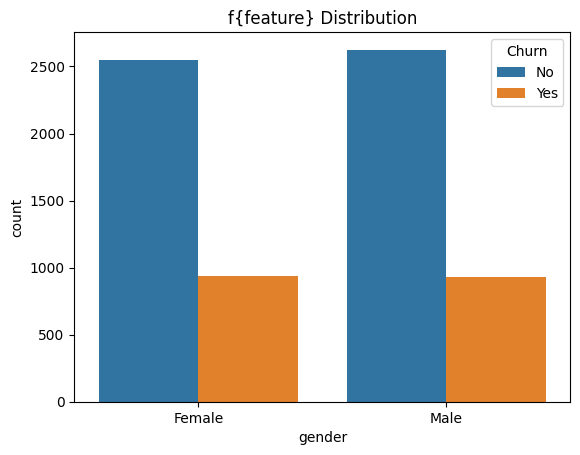

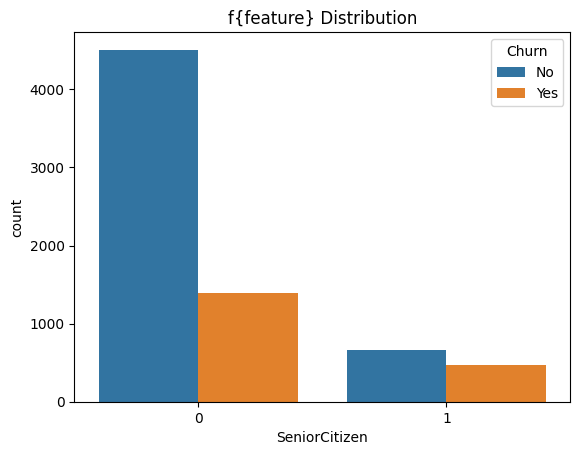

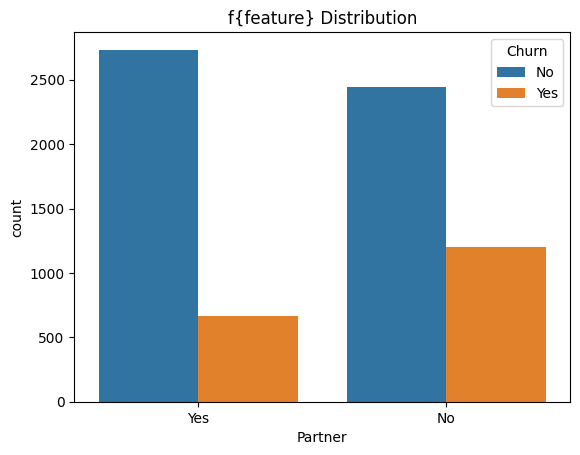

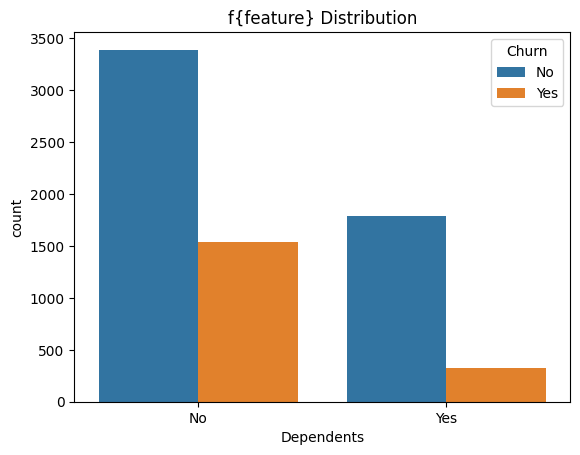

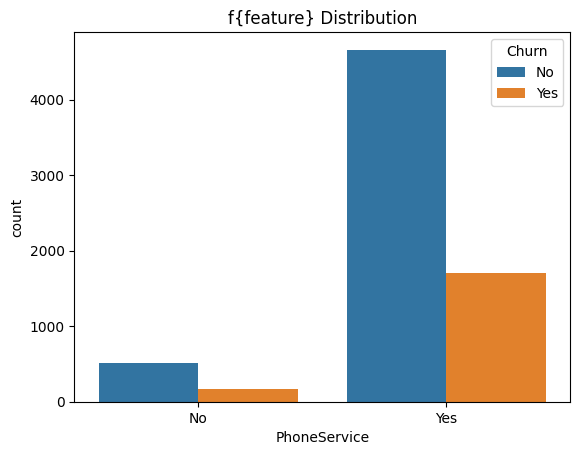

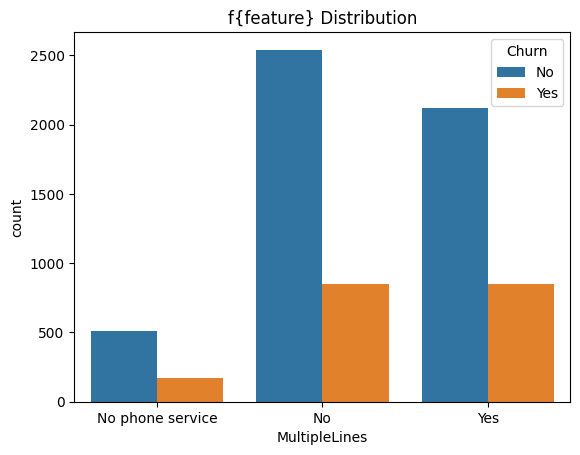

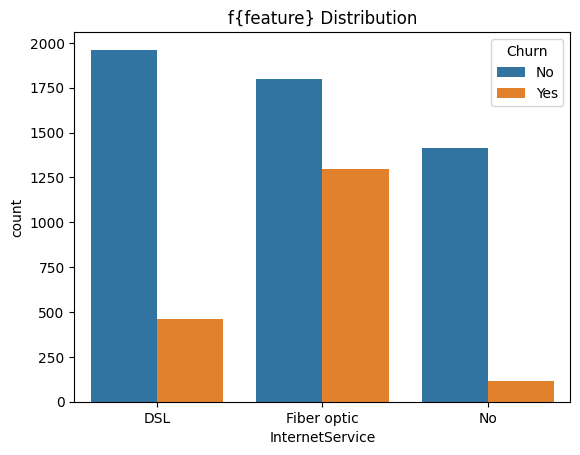

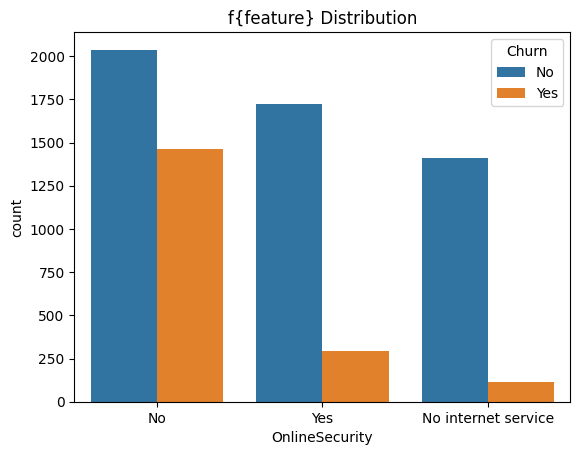

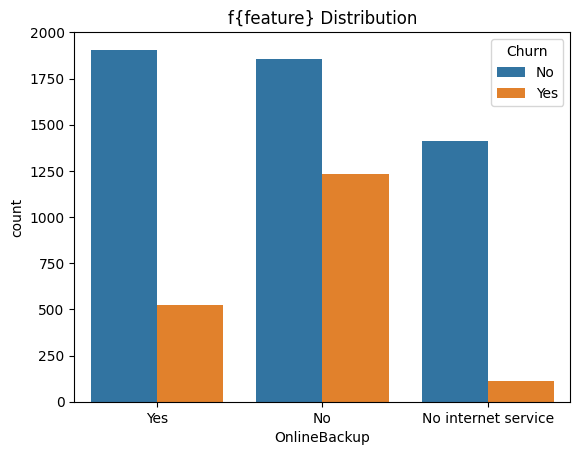

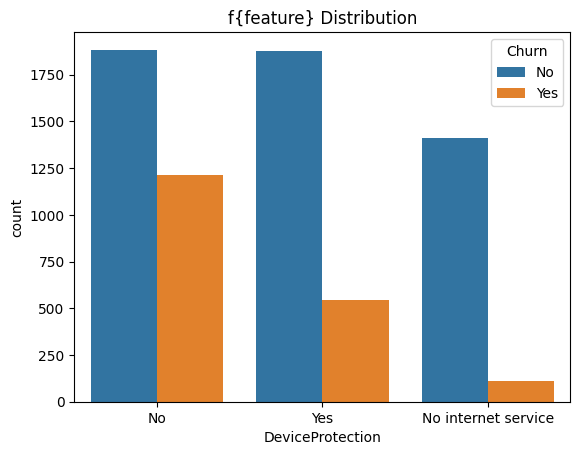

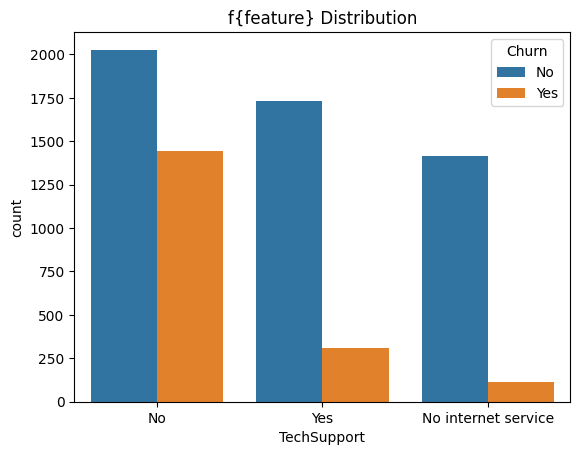

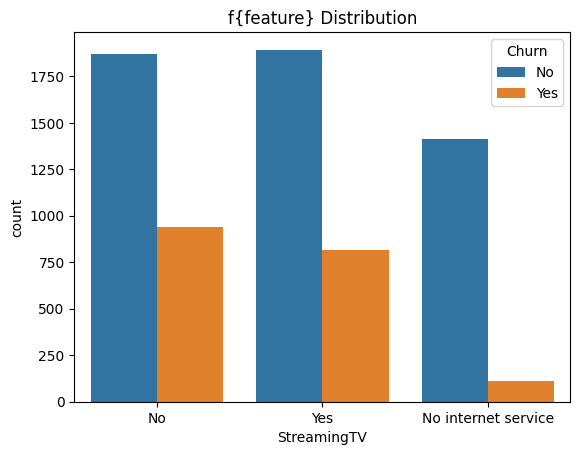

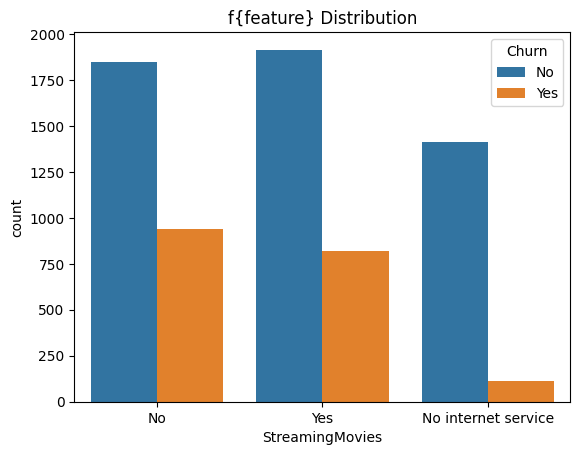

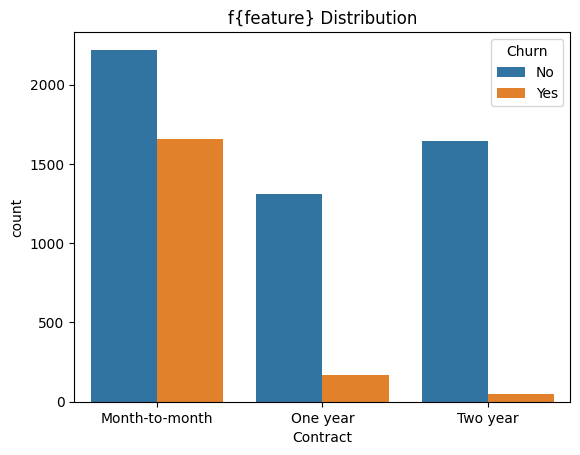

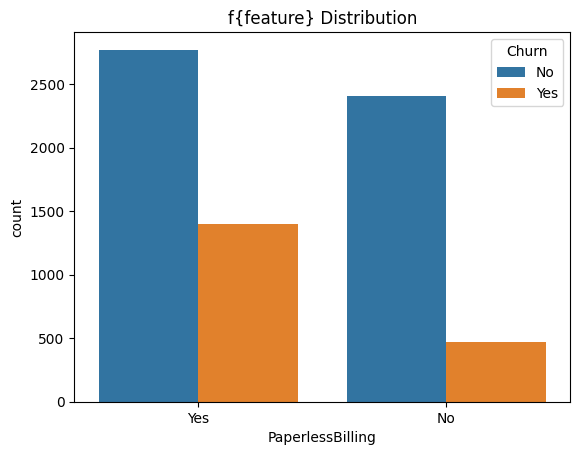

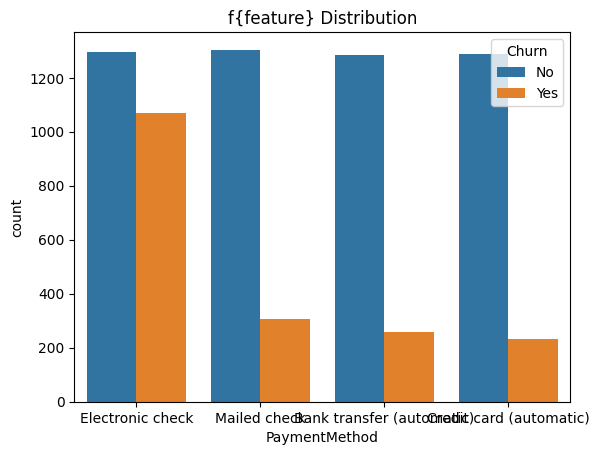

In [9]:
# Distribution of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title('f{feature} Distribution')
    plt.show()

In [20]:
# baseline DNN Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [21]:
# prepare the data
x = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
x = pd.get_dummies(x, drop_first=True)
x = StandardScaler().fit_transform(x)
y = LabelEncoder().fit_transform(y)

In [22]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

In [23]:
# baseline DNN
model_base = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
# compile the model
model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# train the model
history_base = model_base.fit(x_train, y_train, epochs=10, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/10
188/188 [==============================] - 4s 13ms/step - loss: 0.5067 - accuracy: 0.7472 - val_loss: 0.4362 - val_accuracy: 0.7779
Epoch 2/10
188/188 [==============================] - 3s 14ms/step - loss: 0.1365 - accuracy: 0.9494 - val_loss: 0.5711 - val_accuracy: 0.7310
Epoch 3/10
188/188 [==============================] - 3s 14ms/step - loss: 0.0518 - accuracy: 0.9744 - val_loss: 0.6834 - val_accuracy: 0.7090
Epoch 4/10
188/188 [==============================] - 3s 14ms/step - loss: 0.0405 - accuracy: 0.9782 - val_loss: 0.6496 - val_accuracy: 0.7260
Epoch 5/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0323 - accuracy: 0.9819 - val_loss: 0.8226 - val_accuracy: 0.6955
Epoch 6/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0305 - accuracy: 0.9803 - val_loss: 0.8640 - val_accuracy: 0.6934
Epoch 7/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0272 - accuracy: 0.9826 - val_loss: 1.0147 - val_accuracy: 0.6686

In [29]:
# Dropout DNN model architecture
model_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [31]:
# compile the model
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# train the model
history_dropout = model_dropout.fit(x_train, y_train, epochs=10, batch_size=20, validation_data=(x_test, y_test))

Epoch 1/10
282/282 [==============================] - 4s 13ms/step - loss: 0.0506 - accuracy: 0.9792 - val_loss: 1.2767 - val_accuracy: 0.7119
Epoch 2/10
282/282 [==============================] - 3s 11ms/step - loss: 0.0508 - accuracy: 0.9778 - val_loss: 1.2797 - val_accuracy: 0.6934
Epoch 3/10
282/282 [==============================] - 3s 11ms/step - loss: 0.0406 - accuracy: 0.9828 - val_loss: 1.5893 - val_accuracy: 0.6941
Epoch 4/10
282/282 [==============================] - 3s 11ms/step - loss: 0.0411 - accuracy: 0.9798 - val_loss: 1.6751 - val_accuracy: 0.6998
Epoch 5/10
282/282 [==============================] - 3s 11ms/step - loss: 0.0447 - accuracy: 0.9785 - val_loss: 1.5716 - val_accuracy: 0.6977
Epoch 6/10
282/282 [==============================] - 3s 11ms/step - loss: 0.0382 - accuracy: 0.9817 - val_loss: 1.7951 - val_accuracy: 0.6884
Epoch 7/10
282/282 [==============================] - 3s 11ms/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 1.9596 - val_accuracy: 0.6877

In [34]:
# layers-wise dropout

model_layer = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [35]:
# compile the model
model_layer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# train the model
history_layer = model_layer.fit(x_train, y_train, epochs=10, batch_size=20, validation_data=(x_test, y_test))

Epoch 1/10
282/282 [==============================] - 4s 13ms/step - loss: 0.0230 - accuracy: 0.9858 - val_loss: 2.3173 - val_accuracy: 0.6664
Epoch 2/10
282/282 [==============================] - 3s 12ms/step - loss: 0.0222 - accuracy: 0.9863 - val_loss: 2.1384 - val_accuracy: 0.6877
Epoch 3/10
282/282 [==============================] - 3s 12ms/step - loss: 0.0237 - accuracy: 0.9874 - val_loss: 1.9503 - val_accuracy: 0.6870
Epoch 4/10
282/282 [==============================] - 3s 12ms/step - loss: 0.0222 - accuracy: 0.9870 - val_loss: 2.0873 - val_accuracy: 0.6849
Epoch 5/10
282/282 [==============================] - 4s 13ms/step - loss: 0.0225 - accuracy: 0.9865 - val_loss: 2.6158 - val_accuracy: 0.6664
Epoch 6/10
282/282 [==============================] - 3s 12ms/step - loss: 0.0232 - accuracy: 0.9872 - val_loss: 2.8202 - val_accuracy: 0.6508
Epoch 7/10
282/282 [==============================] - 4s 14ms/step - loss: 0.0219 - accuracy: 0.9883 - val_loss: 2.9586 - val_accuracy: 0.6409

In [39]:
model_mc = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='softmax')
])

In [42]:
# compile the model
model_mc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history_mc = model_mc.fit(x_train, y_train, epochs=10, batch_size=15, validation_data=(x_test, y_test))

Epoch 1/10
376/376 [==============================] - 7s 12ms/step - loss: 0.6604 - accuracy: 0.2701 - val_loss: 0.5504 - val_accuracy: 0.2463
Epoch 2/10
376/376 [==============================] - 4s 11ms/step - loss: 0.5279 - accuracy: 0.2701 - val_loss: 0.4945 - val_accuracy: 0.2463
Epoch 3/10
376/376 [==============================] - 4s 11ms/step - loss: 0.4292 - accuracy: 0.2701 - val_loss: 0.4671 - val_accuracy: 0.2463
Epoch 4/10
376/376 [==============================] - 4s 11ms/step - loss: 0.2987 - accuracy: 0.2701 - val_loss: 0.4649 - val_accuracy: 0.2463
Epoch 5/10
376/376 [==============================] - 4s 11ms/step - loss: 0.1733 - accuracy: 0.2701 - val_loss: 0.6640 - val_accuracy: 0.2463
Epoch 6/10
376/376 [==============================] - 5s 12ms/step - loss: 0.1033 - accuracy: 0.2701 - val_loss: 0.9131 - val_accuracy: 0.2463
Epoch 7/10
376/376 [==============================] - 4s 12ms/step - loss: 0.0838 - accuracy: 0.2701 - val_loss: 1.1839 - val_accuracy: 0.2463

In [49]:
# compare performance metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = [model_base, model_dropout, model_layer, model_mc]
histories = [history_base, history_dropout, history_layer, history_mc]

metrics = {'accuracy': accuracy_score, 'f1_score': f1_score, 'roc_auc_score': roc_auc_score}
results = {}

for model, hsitory in zip(models, histories):
    y_pred = model.predict(x_test)
    y_pred_bin = (y_pred > 0.5).astype(int)
    results[model.name] = {}
    for metrics_name, metric_func in metrics.items():
        results[model.name][metrics_name] = metric_func(y_test, y_pred_bin)

45/45 [==============================] - 0s 3ms/step


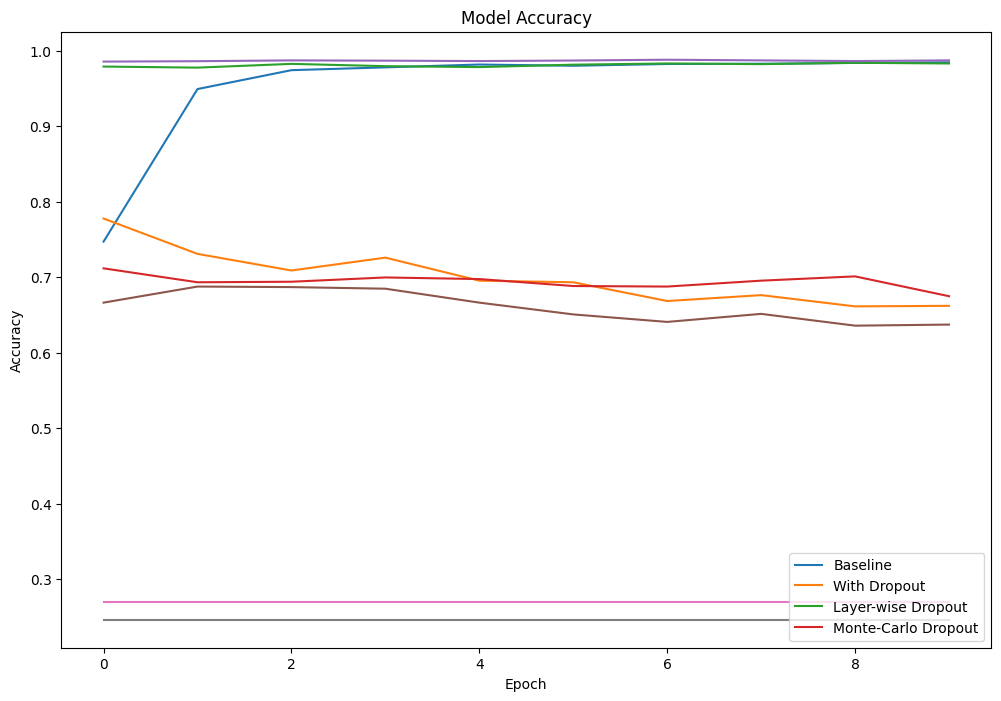

In [54]:
# visualize training and testing accuracy/loss curves
plt.figure(figsize=(12,8))
for history in histories:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Baseline', 'With Dropout', 'Layer-wise Dropout', 'Monte-Carlo Dropout'], loc='lower right')
plt.show()

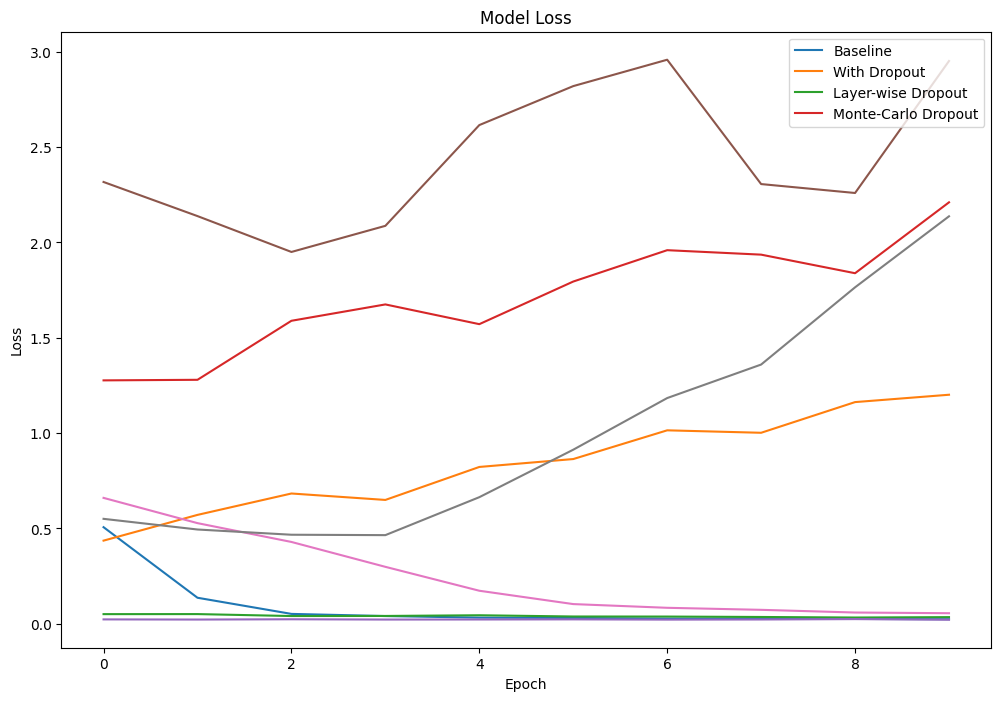

In [52]:
plt.figure(figsize=(12, 8))
for history in histories:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Baseline', 'With Dropout', 'Layer-wise Dropout', 'Monte-Carlo Dropout'], loc='upper right')
plt.show()